# Quick demo of a location extraction routine on a wideshot scan, which extracts the center from each detected contour/bias triangle

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from tqdm import tqdm
from pathlib import Path
import cv2 as cv

root_dir = ""

data_path  = 'stab_diagrams'
nanowire_data = []
for filename in tqdm(Path(data_path).rglob("*.pkl")):
    nanowire_data.append(pickle.load(open(filename, "rb")))

10it [00:00, 562.90it/s]


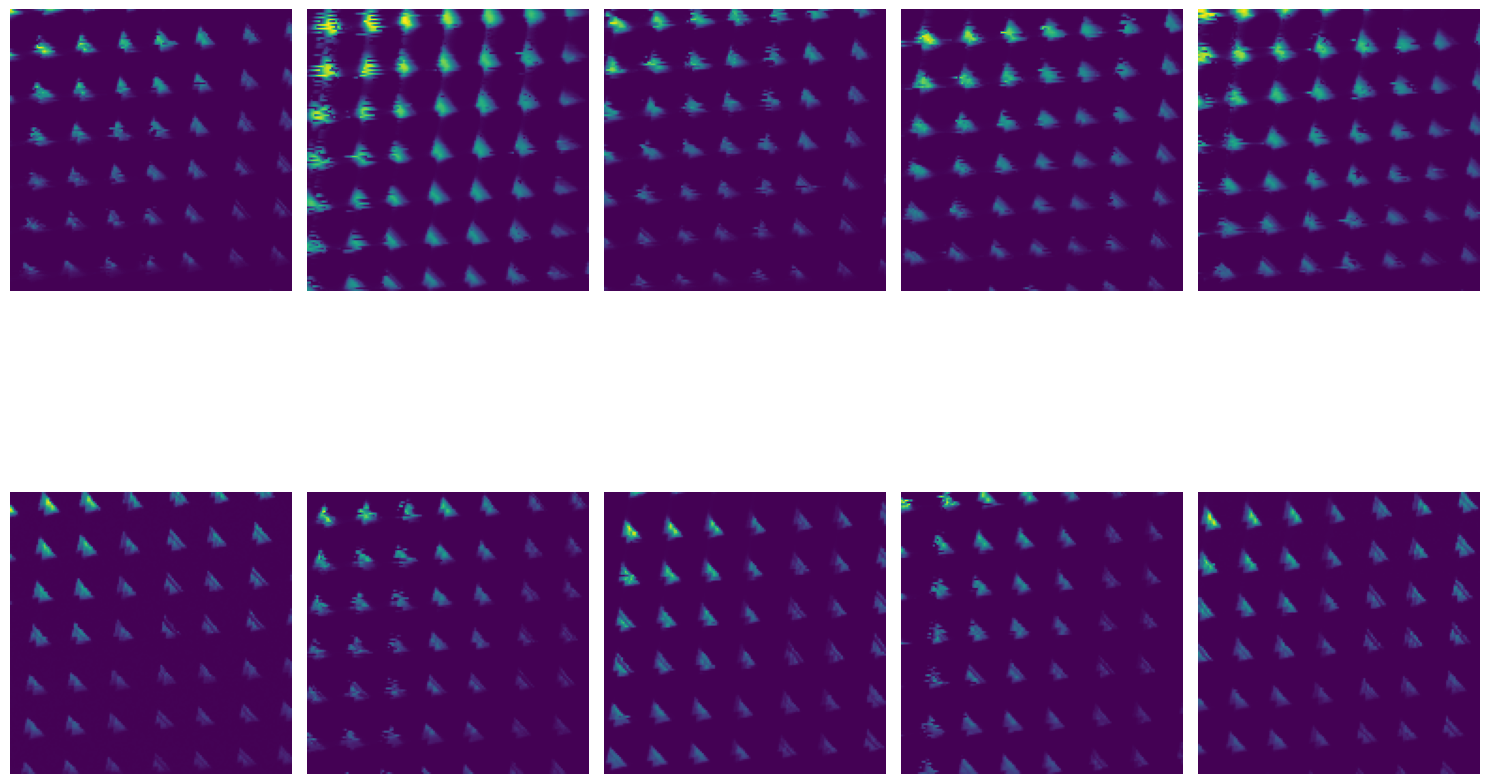

In [19]:
from btriangle_detection import triangle_segmentation_alg
fig, ax = plt.subplots(nrows=2, ncols=5, figsize= (15, 12),sharex=True, sharey=True)
    
for i in range(2):
    for j in range(5):
        
           ax[i,j].imshow(-nanowire_data[i*5+j]['numpy'])
           ax[i,j].axis('off') 
           
fig.tight_layout()
plt.show() 

__Single example__

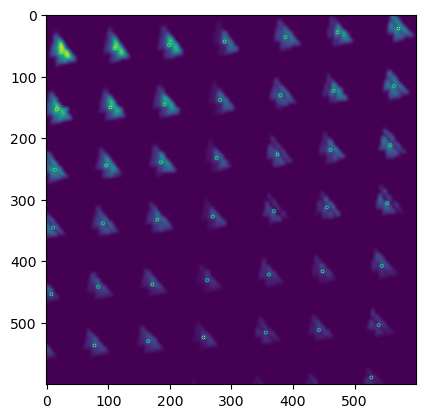

In [20]:
import btriangle_properties

res_h = 4
min_area_h = (nanowire_data[i*5+j]['numpy'].shape[0]*nanowire_data[i*5+j]['numpy'].shape[1]*res_h*res_h)*0.001
img, ims, masks = triangle_segmentation_alg(-nanowire_data[i*5+j]['numpy'],res = res_h,min_area = min_area_h, thr_method = 'triangle', denoising = True, allow_MET = False, direction = 'down')

img_new, locations = btriangle_properties.location_by_contour(img, masks)

plt.imshow(img_new)

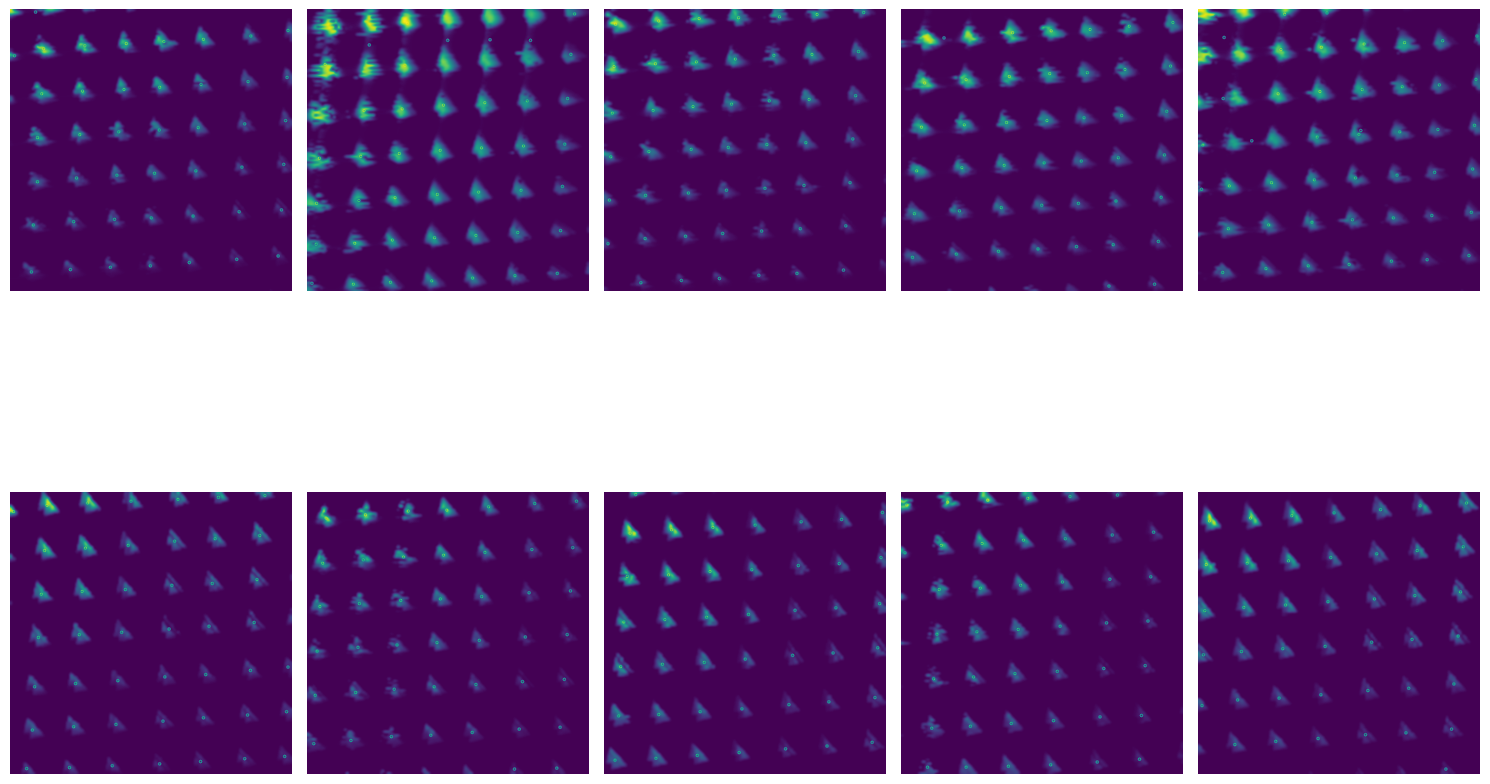

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize= (15, 12),sharex=True, sharey=True)
    
for i in range(2):
    for j in range(5):
           
           res_h = 4
           min_area_h = (nanowire_data[i*5+j]['numpy'].shape[0]*nanowire_data[i*5+j]['numpy'].shape[1]*res_h*res_h)*0.001
           img, ims, masks = triangle_segmentation_alg(-nanowire_data[i*5+j]['numpy'],res = res_h,min_area = min_area_h, thr_method = 'triangle', denoising = True, allow_MET = False, direction = 'down')

           img_new, _ = btriangle_properties.location_by_contour(img, masks) 
           ax[i,j].imshow(img_new)
           ax[i,j].axis('off') 
           
fig.tight_layout()
plt.show() 